# Investigate a Data Set Project
# FBI's National Instant Criminal Background Check System Data Set
## `By: Louaye Lamaa`

<a id='intro'></a>
## Introduction
In this project, I will present the analysis of two data sets. The data of the first dataset comes from the FBI's National Instant Criminal Background Check System (NICS). The NICS is used to check if a potential buyer is eligible to buy a gun. The data contains information about each transaction submitted to NICS by day, such as types of guns, permits, and so on. ** It is important to note that data do not represent the number of guns sold.**
The second dataset comes from census.gov, and contains data about the population in the American states, as well as several demographic and socioeconomic data about it between 2010 and 2016.

Regarding the analysis, I will analyze the NICS dataset alone to explore first the overall trend of the firearm background checks. It will be interesting to see which type of gun has the highest check or growth over the time. Also, I will explore the data by state, to see which one has the highest number of firearm background checks and for which type of gun, as well as which state has the positive, negative ,most and least change over the time. 
After this, I will join the two data sets to explore which demographic and socioeconomic factors are associated with a higher demand on guns.

So, to make the work easier, I will define the questions I want to answer:

1. What is the overall trend of the firearm background checks ? What is the most popular type of gun per capita ?
2. Which state has the highest firearm background checks per capita ? Which state shows the most and least change in term of background checks per capita ?
3. What census data impact the firearm background checks per capita ?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
from scipy.stats import pearsonr

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#loading the data from csv and xlsx file into pandas dataframe 
guns_data = pd.read_excel('gun_data.xlsx',engine='openpyxl') # xlrd is not anymore supported as default engine for reading excel files. openpyxl, a Python library to read/write Excel, is used instead.
census = pd.read_csv('U.S. Census Data.csv')

Let's start by assesing the firearm background checks -  **gun_data** dataframe (NICS data).

In [3]:
#get a look at the data to understand it
guns_data.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


After loading the data, I will examine it. I want to know what columns I need, check the shape of the dataframe, duplicated values, null values, unique values in each column, and the datatypes of the columns.

In [4]:
guns_data.shape

(12485, 27)

In [5]:
#check for duplicated rows
guns_data.duplicated().sum()

0

In [6]:
#check for null values
guns_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [7]:
#check the unique values in each column
guns_data.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [8]:
#check the datatypes of the columns
guns_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

So, this data set contains 12485 transactions and 27 columns. As I want to focus on the totals number of the firearm background checks as well as the number of the checks by firearms types, I will drop the others columns to make the exploration process more comprehensible. 

In [9]:
#keep the columns of interest
guns_data = guns_data.iloc[:,np.r_[0,1,4,5,7,26]]

In [10]:
guns_data.head(5)

,month,state,handgun,long_gun,multiple,totals
0,2017-09,Alabama,5734.0,6320.0,317,32019
1,2017-09,Alaska,2320.0,2930.0,160,6303
2,2017-09,Arizona,11063.0,7946.0,631,28394
3,2017-09,Arkansas,4347.0,6063.0,366,17747
4,2017-09,California,37165.0,24581.0,0,123506


let's check the null values and the datatypes again

In [11]:
guns_data.isnull().sum()

month        0
state        0
handgun     20
long_gun    19
multiple     0
totals       0
dtype: int64

In [12]:
# summary of the information in this dataset
guns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     12485 non-null  object 
 1   state     12485 non-null  object 
 2   handgun   12465 non-null  float64
 3   long_gun  12466 non-null  float64
 4   multiple  12485 non-null  int64  
 5   totals    12485 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 585.4+ KB


As expected, there is no null value in month, state and totals columns. 
Concerning datatypes, the necessary change is to transform the month columns from a string to a datetime.
I will address these in the cleaning part. 

=================================================================

Now, I will examine the census data - **census dataframe** 

In [13]:
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [14]:
census.shape

(85, 52)

In [15]:
#duplicated rows
census.duplicated().sum()
#explore them 
census[census.duplicated(keep='first')]

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#check null
census.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [17]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

- Despite that this dataframe contains numerical values about population, the datatypes is a string (object). So, I have to transform them to floats.
- Also, the Fact Note columns contains alot of null values, and as this column is an explanation of the Fact column, I will drop it.
- The states in this dataframe are columns. A better structure is to make a column called state, that will fit better with the structure of the guns_data dataframe and will make my work easier to merge those two dataframes using the states when needed.

So, I will first change the dataframe structure and then do the necessary cleaning. 

In [18]:
# Swith cols and rows using transpose(), this will make the each state a row and each census data a column
census_transpose = census.transpose()

In [19]:
census_transpose.head(5)

,0,1,2,3,4,5,6,7,8,9,...,75,76,77,78,79,80,81,82,83,84
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# make the 'Fact' row -containing the census data names- the header
census_transpose.columns = census_transpose.iloc[0]

In [21]:
census_transpose.columns

Index([                                          'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                            'Persons 65 years and over, percent, April 1, 2010',
                              

In [22]:
census_transpose.index

Index(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [23]:
# reset the index in order to put the states in a column
census_transpose.reset_index(inplace=True)

In [24]:
census_transpose.rename(columns={'index':'state'},inplace=True)

In [25]:
#so now i have the state column
census_transpose.columns

Index([                                                                                 'state',
                                                 'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                              

Now, I will drop the columns that I don't need as I will just focus on some census data, and the rows that don't inlude any valuable info.

In [26]:
census_transpose.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
1,Fact Note,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Either no or too few sample observations were ...,Suppressed to avoid disclosure of confidential...,Fewer than 25 firms,Footnote on this item in place of data,Not available,Suppressed; does not meet publication standards,Not applicable,Value greater than zero but less than half uni...
2,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
census_transpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 86 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   state                                                                                   52 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            51 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      51 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   51 non-null     object
 4   Population, Census, April 1, 2010                                                       51 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

So, we can see that some columns contains non values, so that will be dropped.


In [28]:
#keep the column that have values
census_transpose = census_transpose.loc[:, census_transpose.columns.notnull()]

In [29]:
#cols to drop// 
cols_drop = ['Persons under 5 years, percent, July 1, 2016,  (V2016)','Persons under 5 years, percent, April 1, 2010','Persons under 18 years, percent, July 1, 2016,  (V2016)', 'Persons under 18 years, percent, April 1, 2010','Persons 65 years and over, percent,  July 1, 2016,  (V2016)','Persons 65 years and over, percent, April 1, 2010','Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)','Female persons, percent,  July 1, 2016,  (V2016)','Female persons, percent, April 1, 2010','Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015','In civilian labor force, total, percent of population age 16 years+, 2011-2015','In civilian labor force, female, percent of population age 16 years+, 2011-2015','Total accommodation and food services sales, 2012 ($1,000)','Total employment, percent change, 2014-2015','Total health care and social assistance receipts/revenue, 2012 ($1,000)','Total manufacturers shipments, 2012 ($1,000)','Total merchant wholesaler sales, 2012 ($1,000)','Total retail sales, 2012 ($1,000)','Men-owned firms, 2012', 'Women-owned firms, 2012','Minority-owned firms, 2012', 'Nonminority-owned firms, 2012','Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012','Land area in square miles, 2010', 'FIPS Code', 'NOTE: FIPS Code values are enclosed in quotes to ensure leading zeros remain intact.','Value Notes', '1', 'Fact Notes', '(a)', '(b)', '(c)','Value Flags', '-', 'D', 'F', 'FN', 'S', 'X', 'Z','Population, Census, April 1, 2010','Two or More Races, percent, July 1, 2016,  (V2016)','White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)','Median selected monthly owner costs -with a mortgage, 2011-2015','Median selected monthly owner costs -without a mortgage, 2011-2015','Median gross rent, 2011-2015', 'Building permits, 2016','Language other than English spoken at home, percent of persons age 5 years+, 2011-2015','With a disability, under age 65 years, percent, 2011-2015','Persons  without health insurance, under age 65 years, percent','Total retail sales per capita, 2012','Total nonemployer establishments, 2015', 'All firms, 2012','Total employer establishments, 2015', ]

In [30]:
#I can use np.r_ but i am try to explore different methods
census_transpose.drop(cols_drop,axis=1,inplace=True)

In [31]:
#now I will drop the first two rows because do not contain any state in the state column
census_transpose = census_transpose.iloc[2:,:]

In [32]:
#check the dataframe
census_transpose.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015",...,"Persons per household, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Population per square mile, 2010"
2,Alabama,"4,863,300","4,780,131",1.70%,69.30%,26.80%,0.70%,1.40%,4.20%,"363,170",...,2.55,84.30%,23.50%,24.4,"$43,623","$24,091",17.10%,"1,634,391","67,370,353",94.4
3,Alaska,"741,894","710,249",4.50%,66.10%,3.80%,15.20%,6.30%,7.00%,"69,323",...,2.81,92.10%,28.00%,19,"$72,515","$33,413",9.90%,"267,999","15,643,303",1.2
4,Arizona,"6,931,071","6,392,301",8.40%,83.30%,4.90%,5.40%,3.40%,30.90%,"505,794",...,2.69,86.00%,27.50%,24.8,"$50,255","$25,848",16.40%,"2,295,186","102,671,393",56.3
5,Arkansas,"2,988,248","2,916,025",2.50%,79.40%,15.70%,1.00%,1.60%,7.30%,"220,953",...,2.53,84.80%,21.10%,21.6,"$41,371","$22,798",17.20%,"1,003,113","39,451,191",56
6,California,"39,250,017","37,254,522",5.40%,72.70%,6.50%,1.70%,14.80%,38.90%,"1,777,410",...,2.96,81.80%,31.40%,28,"$61,818","$30,318",14.30%,"14,325,377","856,954,246",239.1


In [33]:
#index start from 2 so we need to reset it
census_transpose.reset_index(inplace=True)

In [34]:
census_transpose.head()

Fact,index,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)",...,"Persons per household, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Population per square mile, 2010"
0,2,Alabama,"4,863,300","4,780,131",1.70%,69.30%,26.80%,0.70%,1.40%,4.20%,...,2.55,84.30%,23.50%,24.4,"$43,623","$24,091",17.10%,"1,634,391","67,370,353",94.4
1,3,Alaska,"741,894","710,249",4.50%,66.10%,3.80%,15.20%,6.30%,7.00%,...,2.81,92.10%,28.00%,19,"$72,515","$33,413",9.90%,"267,999","15,643,303",1.2
2,4,Arizona,"6,931,071","6,392,301",8.40%,83.30%,4.90%,5.40%,3.40%,30.90%,...,2.69,86.00%,27.50%,24.8,"$50,255","$25,848",16.40%,"2,295,186","102,671,393",56.3
3,5,Arkansas,"2,988,248","2,916,025",2.50%,79.40%,15.70%,1.00%,1.60%,7.30%,...,2.53,84.80%,21.10%,21.6,"$41,371","$22,798",17.20%,"1,003,113","39,451,191",56
4,6,California,"39,250,017","37,254,522",5.40%,72.70%,6.50%,1.70%,14.80%,38.90%,...,2.96,81.80%,31.40%,28,"$61,818","$30,318",14.30%,"14,325,377","856,954,246",239.1


In [35]:
#drop the index column
census_transpose.drop(['index'],axis=1,inplace=True)


In [36]:
census_transpose.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015",...,"Persons per household, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Population per square mile, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,69.30%,26.80%,0.70%,1.40%,4.20%,"363,170",...,2.55,84.30%,23.50%,24.4,"$43,623","$24,091",17.10%,"1,634,391","67,370,353",94.4
1,Alaska,"741,894","710,249",4.50%,66.10%,3.80%,15.20%,6.30%,7.00%,"69,323",...,2.81,92.10%,28.00%,19,"$72,515","$33,413",9.90%,"267,999","15,643,303",1.2
2,Arizona,"6,931,071","6,392,301",8.40%,83.30%,4.90%,5.40%,3.40%,30.90%,"505,794",...,2.69,86.00%,27.50%,24.8,"$50,255","$25,848",16.40%,"2,295,186","102,671,393",56.3
3,Arkansas,"2,988,248","2,916,025",2.50%,79.40%,15.70%,1.00%,1.60%,7.30%,"220,953",...,2.53,84.80%,21.10%,21.6,"$41,371","$22,798",17.20%,"1,003,113","39,451,191",56
4,California,"39,250,017","37,254,522",5.40%,72.70%,6.50%,1.70%,14.80%,38.90%,"1,777,410",...,2.96,81.80%,31.40%,28,"$61,818","$30,318",14.30%,"14,325,377","856,954,246",239.1


In [37]:
#delete the index name 'Fact'
census_transpose = census_transpose.rename_axis(None, axis=1)
census_transpose.head()

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","Veterans, 2011-2015",...,"Persons per household, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Mean travel time to work (minutes), workers age 16 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Per capita income in past 12 months (in 2015 dollars), 2011-2015","Persons in poverty, percent","Total employment, 2015","Total annual payroll, 2015 ($1,000)","Population per square mile, 2010"
0,Alabama,"4,863,300","4,780,131",1.70%,69.30%,26.80%,0.70%,1.40%,4.20%,"363,170",...,2.55,84.30%,23.50%,24.4,"$43,623","$24,091",17.10%,"1,634,391","67,370,353",94.4
1,Alaska,"741,894","710,249",4.50%,66.10%,3.80%,15.20%,6.30%,7.00%,"69,323",...,2.81,92.10%,28.00%,19,"$72,515","$33,413",9.90%,"267,999","15,643,303",1.2
2,Arizona,"6,931,071","6,392,301",8.40%,83.30%,4.90%,5.40%,3.40%,30.90%,"505,794",...,2.69,86.00%,27.50%,24.8,"$50,255","$25,848",16.40%,"2,295,186","102,671,393",56.3
3,Arkansas,"2,988,248","2,916,025",2.50%,79.40%,15.70%,1.00%,1.60%,7.30%,"220,953",...,2.53,84.80%,21.10%,21.6,"$41,371","$22,798",17.20%,"1,003,113","39,451,191",56
4,California,"39,250,017","37,254,522",5.40%,72.70%,6.50%,1.70%,14.80%,38.90%,"1,777,410",...,2.96,81.80%,31.40%,28,"$61,818","$30,318",14.30%,"14,325,377","856,954,246",239.1


In [38]:
#check the dataframe duplicate in his new structure
census_transpose.duplicated().sum()

0

In [39]:
census_transpose.isnull().sum()

state                                                                                    0
Population estimates, July 1, 2016,  (V2016)                                             0
Population estimates base, April 1, 2010,  (V2016)                                       0
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    0
White alone, percent, July 1, 2016,  (V2016)                                             0
Black or African American alone, percent, July 1, 2016,  (V2016)                         0
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)                 0
Asian alone, percent, July 1, 2016,  (V2016)                                             0
Hispanic or Latino, percent, July 1, 2016,  (V2016)                                      0
Veterans, 2011-2015                                                                      0
Foreign born persons, percent, 2011-2015                                                 0

In [40]:
census_transpose.nunique()

state                                                                                    50
Population estimates, July 1, 2016,  (V2016)                                             50
Population estimates base, April 1, 2010,  (V2016)                                       50
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    45
White alone, percent, July 1, 2016,  (V2016)                                             47
Black or African American alone, percent, July 1, 2016,  (V2016)                         46
American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)                 30
Asian alone, percent, July 1, 2016,  (V2016)                                             42
Hispanic or Latino, percent, July 1, 2016,  (V2016)                                      47
Veterans, 2011-2015                                                                      50
Foreign born persons, percent, 2011-2015                                        

Interesting that the number of states here (50) is not the same as the number in the firearm background checks data set (55). So I will address this in the cleaning part. As well, I have also to change columns names and the datatypes.

### Data Cleaning

For ** guns_data ** dataframe, cleaning process involves:
- decide what to do with null values
- change datatypes for the month column 


Null values: 
There two columns that contain null values --> handgun and long_gun
Let's examine those two fields


In [41]:
guns_data[guns_data.handgun.isnull()]
guns_data[guns_data.long_gun.isnull()]

,month,state,handgun,long_gun,multiple,totals
7914,2005-10,Virgin Islands,NaN,NaN,0,0
7969,2005-09,Virgin Islands,NaN,NaN,0,0
8024,2005-08,Virgin Islands,NaN,NaN,0,0
8079,2005-07,Virgin Islands,NaN,NaN,0,0
8134,2005-06,Virgin Islands,NaN,NaN,0,0
8189,2005-05,Virgin Islands,NaN,NaN,0,0
8299,2005-03,Virgin Islands,NaN,NaN,0,0
8354,2005-02,Virgin Islands,NaN,NaN,0,0
8409,2005-01,Virgin Islands,NaN,NaN,0,0
8491,2004-11,Mariana Islands,NaN,NaN,0,0


Looks like for the two columns, the total columns is filled with zeros, so I will not drop these rows, but i want to replace NaN with 0.

In [42]:
#using this method becaue just these two columns contain NaN.
guns_data.fillna(0,inplace=True)

In [43]:
#check for null values now
guns_data.isnull().sum()

month       0
state       0
handgun     0
long_gun    0
multiple    0
totals      0
dtype: int64

Datatypes:
- change month from string to datetime
- change others columns from float to int like totals column.

In [44]:
#month 
guns_data.month = pd.to_datetime(guns_data['month'])
#handgun, long_gun
guns_data.handgun =  guns_data['handgun'].astype('Int64')
guns_data.long_gun =  guns_data['long_gun'].astype('Int64')

In [45]:
guns_data.dtypes

month       datetime64[ns]
state               object
handgun              Int64
long_gun             Int64
multiple             int64
totals               int64
dtype: object

As we saw, there are five states in the gun data set that are not present in the census data. I will drop those five states even if they will not be included when I merge the two datasets because only the states that match will be in the merged dataset.

In [46]:
#check the state that don't exist in the census data set
list(set(guns_data.state) - set(census_transpose.state))

['Mariana Islands',
 'Virgin Islands',
 'District of Columbia',
 'Puerto Rico',
 'Guam']

In [47]:
drop_state = ['Mariana Islands','Puerto Rico','District of Columbia','Guam','Virgin Islands']

In [48]:
#filter here guns_data to keep all except those states in drop_state list
guns_data = guns_data[~guns_data['state'].isin(drop_state)]

In [49]:
guns_data.state.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

** census data cleaning ** 
- rename the columns to a simpler form
- change datatypes from strings to float

As there is no pattern in the names of the columns, I will rename them without using any functions.

In [50]:
census_transpose.columns

Index(['state', 'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'Veterans, 2011-2015', 'Foreign born persons, percent, 2011-2015',
       'Housing units,  July 1, 2016,  (V2016)',
       'Housing units, April 1, 2010',
       'Owner-occupied housing unit rate, 2011-2015',
       'Median value of owner-occupied housing units, 2011-2015',
       'Households, 2011-2015', 'Persons per household, 2011-2015',
       'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
       'Bache

In [51]:
new_names = ['state','population_estimate_2016','population_estimate_2010','population_percent_10_16','white_percent_2016','black_african_percent_2016','amerian_indian_alaska_percent_2016','asian_percent_2016','hispanic_latino_percent_2016',
'veterans_11_15', 'foreigns_percent_11_15','housing_units_2016','housing_units_2010','housing_unit_percent_11_15','median_value_housing units_11_15','households,_11_15', 'persons_per_household_11_15','high_school_graduate_percent_11-15','bachelor_degree_percent_11-15','mean_minutes_to_work_11_15','median_household_income_11_15','per_capita_income_11_15','persons_in_poverty_percent','total_employment_2015', 'total_annual_payroll_15','density_2010']
census_transpose.columns = new_names

In [52]:
census_transpose.columns

Index(['state', 'population_estimate_2016', 'population_estimate_2010',
       'population_percent_10_16', 'white_percent_2016',
       'black_african_percent_2016', 'amerian_indian_alaska_percent_2016',
       'asian_percent_2016', 'hispanic_latino_percent_2016', 'veterans_11_15',
       'foreigns_percent_11_15', 'housing_units_2016', 'housing_units_2010',
       'housing_unit_percent_11_15', 'median_value_housing units_11_15',
       'households,_11_15', 'persons_per_household_11_15',
       'high_school_graduate_percent_11-15', 'bachelor_degree_percent_11-15',
       'mean_minutes_to_work_11_15', 'median_household_income_11_15',
       'per_capita_income_11_15', 'persons_in_poverty_percent',
       'total_employment_2015', 'total_annual_payroll_15', 'density_2010'],
      dtype='object')

In [53]:
census_transpose.dtypes

state                                 object
population_estimate_2016              object
population_estimate_2010              object
population_percent_10_16              object
white_percent_2016                    object
black_african_percent_2016            object
amerian_indian_alaska_percent_2016    object
asian_percent_2016                    object
hispanic_latino_percent_2016          object
veterans_11_15                        object
foreigns_percent_11_15                object
housing_units_2016                    object
housing_units_2010                    object
housing_unit_percent_11_15            object
median_value_housing units_11_15      object
households,_11_15                     object
persons_per_household_11_15           object
high_school_graduate_percent_11-15    object
bachelor_degree_percent_11-15         object
mean_minutes_to_work_11_15            object
median_household_income_11_15         object
per_capita_income_11_15               object
persons_in

All these columns should be float (except state). Before this, I have to remove special characters from the strings in those columns. These special characters include % , $ and , used in the numbers.

The columns that contain percent, some values are decimals, so when I remove the %, I should divide them by 100 to have the same format for all values. So, I will remove $ and , and then I will remove % and divide by 100.

In [54]:
#remove others special and unwanted characters by replacing them with empty spaces
for c in census_transpose.columns:
    census_transpose[c] = census_transpose[c].apply(lambda x: str(x.replace('$','').replace(',','')))

In [55]:
#create a copy to be used when remove % and divide by 100
census_transpose_copy = census_transpose.copy()

In [56]:
#a list of columns that contains percent character 
percent_cols = [col for col in census_transpose.columns if 'percent' in col]
percent_cols

['population_percent_10_16',
 'white_percent_2016',
 'black_african_percent_2016',
 'amerian_indian_alaska_percent_2016',
 'asian_percent_2016',
 'hispanic_latino_percent_2016',
 'foreigns_percent_11_15',
 'housing_unit_percent_11_15',
 'high_school_graduate_percent_11-15',
 'bachelor_degree_percent_11-15',
 'persons_in_poverty_percent']

In [57]:
#Remove % from the columns that contains it
for col in percent_cols:
        masks = census_transpose[census_transpose[col].str.contains('%')]
        census_transpose[col] = masks[col].apply(lambda x:float(x.replace('%','')))/100
        #The idea of the above logic is that as there values that already are decimals, I don't want to divide them by 100
        # because the values that do not contain % are not in the masks, so I replace them by the original values from the original dataframe copy
        census_transpose[col] = np.where(census_transpose[col].isnull(), census_transpose_copy[col], census_transpose[col])

In [58]:
census_transpose.head()

,state,population_estimate_2016,population_estimate_2010,population_percent_10_16,white_percent_2016,black_african_percent_2016,amerian_indian_alaska_percent_2016,asian_percent_2016,hispanic_latino_percent_2016,veterans_11_15,...,persons_per_household_11_15,high_school_graduate_percent_11-15,bachelor_degree_percent_11-15,mean_minutes_to_work_11_15,median_household_income_11_15,per_capita_income_11_15,persons_in_poverty_percent,total_employment_2015,total_annual_payroll_15,density_2010
0,Alabama,4863300,4780131,0.017,0.693,0.268,0.007,0.014,0.042,363170,...,2.55,0.843,0.235,24.4,43623,24091,0.171,1634391,67370353,94.4
1,Alaska,741894,710249,0.045,0.661,0.038,0.152,0.063,0.07,69323,...,2.81,0.921,0.28,19,72515,33413,0.099,267999,15643303,1.2
2,Arizona,6931071,6392301,0.084,0.833,0.049,0.054,0.034,0.309,505794,...,2.69,0.86,0.275,24.8,50255,25848,0.164,2295186,102671393,56.3
3,Arkansas,2988248,2916025,0.025,0.794,0.157,0.01,0.016,0.073,220953,...,2.53,0.848,0.211,21.6,41371,22798,0.172,1003113,39451191,56
4,California,39250017,37254522,0.054,0.727,0.065,0.017,0.148,0.389,1777410,...,2.96,0.818,0.314,28,61818,30318,0.143,14325377,856954246,239.1


In [59]:
#now we can convert all columns to float except state using list comprehension 
col_float = [col for col in census_transpose.columns if col not in ['state']]
for c in col_float:
    census_transpose[c] = census_transpose[c].astype(float)

In [60]:
#check the types of the columns again to make sure all float
census_transpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   state                               50 non-null     object 
 1   population_estimate_2016            50 non-null     float64
 2   population_estimate_2010            50 non-null     float64
 3   population_percent_10_16            50 non-null     float64
 4   white_percent_2016                  50 non-null     float64
 5   black_african_percent_2016          50 non-null     float64
 6   amerian_indian_alaska_percent_2016  50 non-null     float64
 7   asian_percent_2016                  50 non-null     float64
 8   hispanic_latino_percent_2016        50 non-null     float64
 9   veterans_11_15                      50 non-null     float64
 10  foreigns_percent_11_15              50 non-null     float64
 11  housing_units_2016                  50 non-null

In [61]:
census_transpose.head()

,state,population_estimate_2016,population_estimate_2010,population_percent_10_16,white_percent_2016,black_african_percent_2016,amerian_indian_alaska_percent_2016,asian_percent_2016,hispanic_latino_percent_2016,veterans_11_15,...,persons_per_household_11_15,high_school_graduate_percent_11-15,bachelor_degree_percent_11-15,mean_minutes_to_work_11_15,median_household_income_11_15,per_capita_income_11_15,persons_in_poverty_percent,total_employment_2015,total_annual_payroll_15,density_2010
0,Alabama,4863300.0,4780131.0,0.017,0.693,0.268,0.007,0.014,0.042,363170.0,...,2.55,0.843,0.235,24.4,43623.0,24091.0,0.171,1634391.0,67370353.0,94.4
1,Alaska,741894.0,710249.0,0.045,0.661,0.038,0.152,0.063,0.070,69323.0,...,2.81,0.921,0.280,19.0,72515.0,33413.0,0.099,267999.0,15643303.0,1.2
2,Arizona,6931071.0,6392301.0,0.084,0.833,0.049,0.054,0.034,0.309,505794.0,...,2.69,0.860,0.275,24.8,50255.0,25848.0,0.164,2295186.0,102671393.0,56.3
3,Arkansas,2988248.0,2916025.0,0.025,0.794,0.157,0.010,0.016,0.073,220953.0,...,2.53,0.848,0.211,21.6,41371.0,22798.0,0.172,1003113.0,39451191.0,56.0
4,California,39250017.0,37254522.0,0.054,0.727,0.065,0.017,0.148,0.389,1777410.0,...,2.96,0.818,0.314,28.0,61818.0,30318.0,0.143,14325377.0,856954246.0,239.1


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the overall trend of the firearm background checks ? What is the most popular type of gun per capita ?

To answer the first part of the question, I will use the two columns **month** and ** totals ** using the **guns_data** dataframe. Then, to make sure that the trend is not related to an expansion in the population over the time, I will analyze the background checks average by person.

For the second part, I will analyze each type of gun alone over the time, as well as the average checks by person for each type.

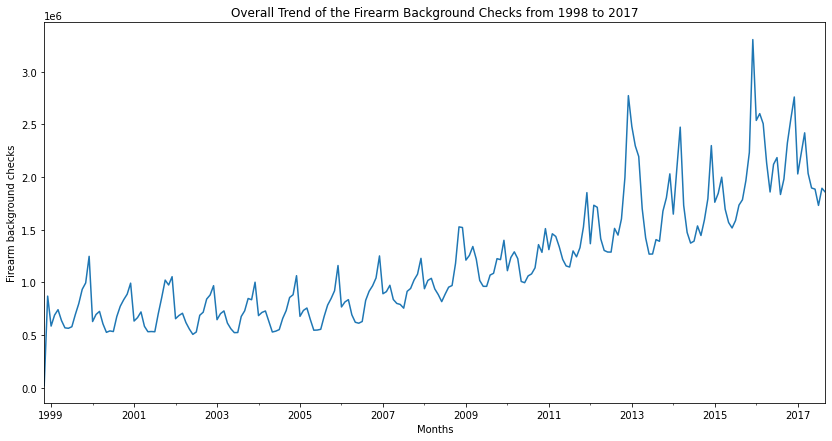

In [62]:
# overall trend of the firearm backgrounds checks
fig, ax = plt.subplots(figsize=(14,7))
guns_data.groupby('month')['totals'].sum().plot()
plt.title('Overall Trend of the Firearm Background Checks from 1998 to 2017')
plt.xlabel('Months')
plt.ylabel('Firearm background checks');

According to this graph, the firearm background checks have increased from 1998 to 2017. It looks like every and each year have a peak in a similiar pattern, so I will check the background checks by month of the year. To do so, I will create a column including the background checks in each month of a year.

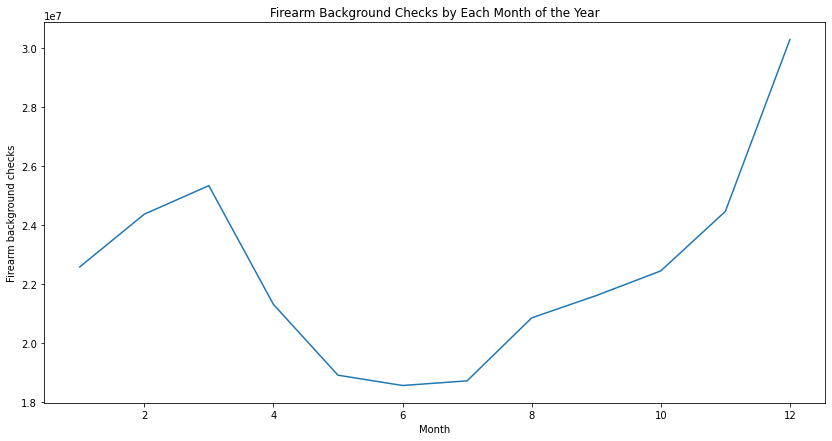

In [63]:
#get the months from 1 to 12
guns_data['month_of_year'] = guns_data['month'].dt.month
#get the background checks by month regardless of the year
fig, ax = plt.subplots(figsize=(14,7))
guns_data.groupby('month_of_year')['totals'].sum().plot()
plt.title('Firearm Background Checks by Each Month of the Year')
plt.xlabel('Month')
plt.ylabel('Firearm background checks');

From the graph above, we can see that the background checks have a steady increasing pattern from the summer towards the end of the year.

Now, I want to check the firearm background checks per capita. I have to make sure that this growing trend is not a cause of the change in population size over the time. As I have data about population just in 2010 and 2016, I will calculate the background checks per capita for these two years.  

First, I will create a new dataframe containing background checks data in 2010 and 2016.

In [64]:
#extract the data of 2010 and 2016 from guns_data dataframe. I extracted the year from the month column and treated it as string to filter based on it.
guns_2010_16 = guns_data[guns_data['month'].dt.year.astype(str).str.contains('2010|2016')]

I will need the total background checks in each year, so I will create a year column in order group by it.

In [65]:
guns_2010_16['year'] = guns_2010_16['month'].dt.year

<ipython-input-65-0fa7c7796053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guns_2010_16['year'] = guns_2010_16['month'].dt.year


In [66]:
guns_2010_16.year

495     2016
496     2016
497     2016
498     2016
499     2016
        ... 
5110    2010
5111    2010
5112    2010
5113    2010
5114    2010
Name: year, Length: 1200, dtype: int64

In [67]:
#tranform datatype from integer to datetime
guns_2010_16['year'] = pd.to_datetime(guns_2010_16['year'])

<ipython-input-67-5715a1cbf2a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  guns_2010_16['year'] = pd.to_datetime(guns_2010_16['year'])


In [68]:
#make sure the conversion is successful
guns_2010_16.dtypes

month            datetime64[ns]
state                    object
handgun                   Int64
long_gun                  Int64
multiple                  int64
totals                    int64
month_of_year             int64
year             datetime64[ns]
dtype: object

In [69]:
#calculate the total of the firearm background checks for each year
guns_10 = guns_2010_16.groupby('year')['totals'].sum()[0]
guns_16 = guns_2010_16.groupby('year')['totals'].sum()[1]

Then, I will calculate the total population of all states in 2016 and 2010 using the census data in order to get the per capita metric.

In [70]:
#total population in each year
population_10 = census_transpose.population_estimate_2010.sum()
population_16 =census_transpose.population_estimate_2016.sum()

It is clear that the population increased in size from 2010 to 2016. Now, I will calculate the background checks per capita in 2010 and comapre it to 2016 to see if that population growing is the reason behind the rising of the firearm background checks.

In [71]:
#background checks per capita for each year
capita10 = guns_10/population_10
capita16 = guns_16/population_16

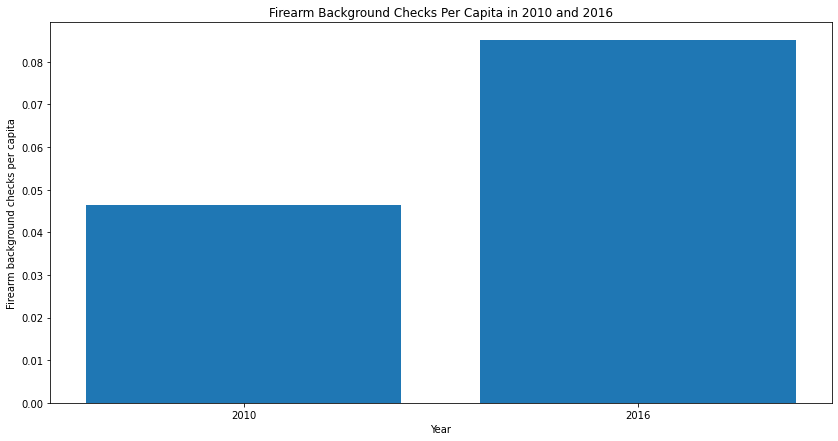

In [72]:
#plot the bar chart of the per capita in each year
locations = [1,2]
heights = [capita10,capita16]
fig= plt.subplots(figsize=(14,7))
plt.bar(locations,height=heights,tick_label = ['2010','2016'])
plt.title('Firearm Background Checks Per Capita in 2010 and 2016')
plt.xlabel('Year')
plt.ylabel('Firearm background checks per capita');

As shown, the background checks per capita doubled from 2010 to 2016, that's mean the increase in the background checks over the time is not because the expansion of the population in the US.

Now, I will analyze each type of guns in the same way I did above. First, I will explore the trend of each type, then I will analyze the background checks of each type per capita.

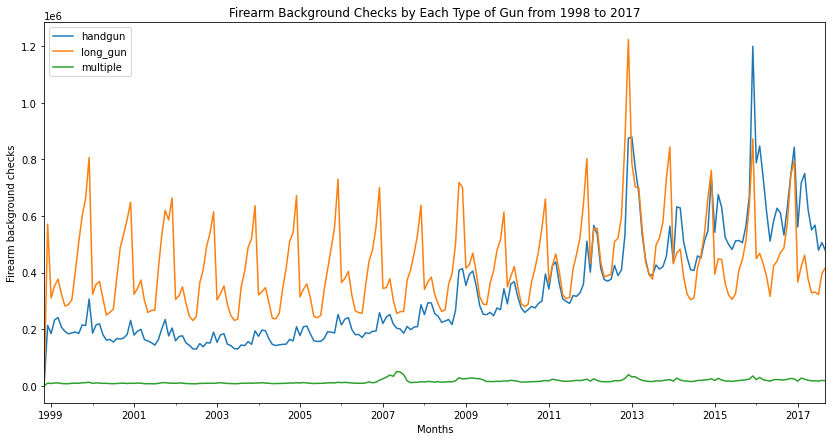

In [73]:
#overall trend of handgunmlonggun, and multiple
fig, ax = plt.subplots(figsize=(14,7))
guns_data.groupby(['month'])['handgun'].sum().plot(ax=ax,legend=True)
guns_data.groupby(['month'])['long_gun'].sum().plot(ax=ax,legend=True)
guns_data.groupby(['month'])['multiple'].sum().plot(ax=ax,legend=True)
plt.title('Firearm Background Checks by Each Type of Gun from 1998 to 2017')
plt.xlabel('Months')
plt.ylabel('Firearm background checks');

Surprisingly, the background checks for long guns is bigger than handguns' for most of the time (although we can see that hangun started to rise in 2010's) which supposed to be a peronal gun, but we can't conclude this because this data is not a sales data. The pattern of these two types is similiar to the totals checks, with a peaks inside each year. The multiple type checks is less than the other types, and its pattern is more linear over the time.

 I will calculate the background checks per capita for each type for a clearer picture. I will use the dataframe used to calculate the checks per capita for totals checks.
 

In [74]:
#already have the population for 2010 and 2016 so I will calculate the checks for each type in each year.
#handgun per capita
handgun16 = guns_2010_16.groupby('year')['handgun'].sum()[1]
handgun10 = guns_2010_16.groupby('year')['handgun'].sum()[0]
handgun_capita_16 = handgun16 / population_16 
handgun_capita_10 = handgun10 / population_10 

In [75]:
#long_gun per capita
long_gun16 = guns_2010_16.groupby('year')['long_gun'].sum()[1]
long_gun10 = guns_2010_16.groupby('year')['long_gun'].sum()[0]
longgun_capita_10 = long_gun10 / population_10 
longgun_capita_16 = long_gun16 / population_16 

In [76]:
multiple16 = guns_2010_16.groupby('year')['multiple'].sum()[1]
multiple10 = guns_2010_16.groupby('year')['multiple'].sum()[0]
multiple_capita_10 = multiple10 / population_10
multiple_capita_16 = multiple16 / population_16

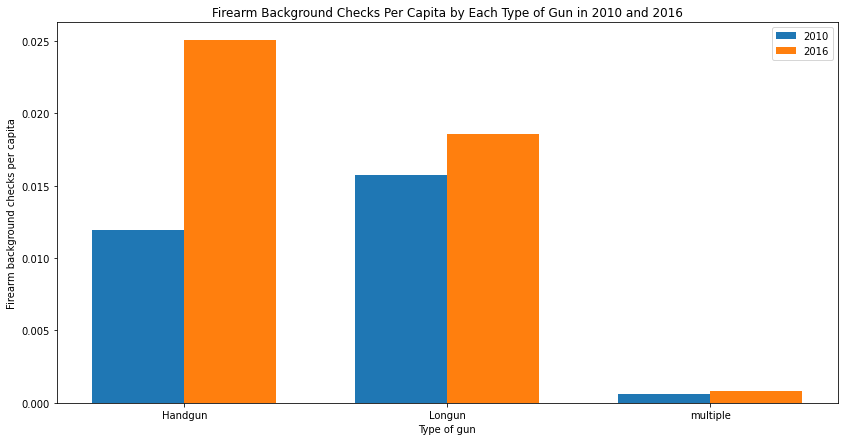

In [77]:
labels = ['Handgun', 'Longun','multiple']
y2010 = [handgun_capita_10, longgun_capita_10, multiple_capita_10]
y2016 = [handgun_capita_16, longgun_capita_16, multiple_capita_16]

x = np.arange(len(labels))  
width = 0.35  

fig, graph = plt.subplots(figsize=(14,7))
bar10 = graph.bar(x - width/2, y2010, width, label='2010')
bar16 = graph.bar(x + width/2, y2016, width, label='2016')
graph.set_title('Firearm Background Checks Per Capita by Each Type of Gun in 2010 and 2016')
graph.set_ylabel('Firearm background checks per capita')
graph.set_xlabel('Type of gun')
graph.set_xticks(x)
graph.set_xticklabels(labels)
graph.legend()

plt.show()


Background checks for all types of guns increased from 2010 to 2016. While long gun background checks increased, the handgun checks passed it in 2016 as it doubled. The multiple checks also increased while being still way low than the others. 

### Research Question 2: Which state has the highest firearm background checks per capita ? Which state shows the most and least change in term of background checks per capita ?

 I will see which state have the most backgrounds checks and background checks per capita.

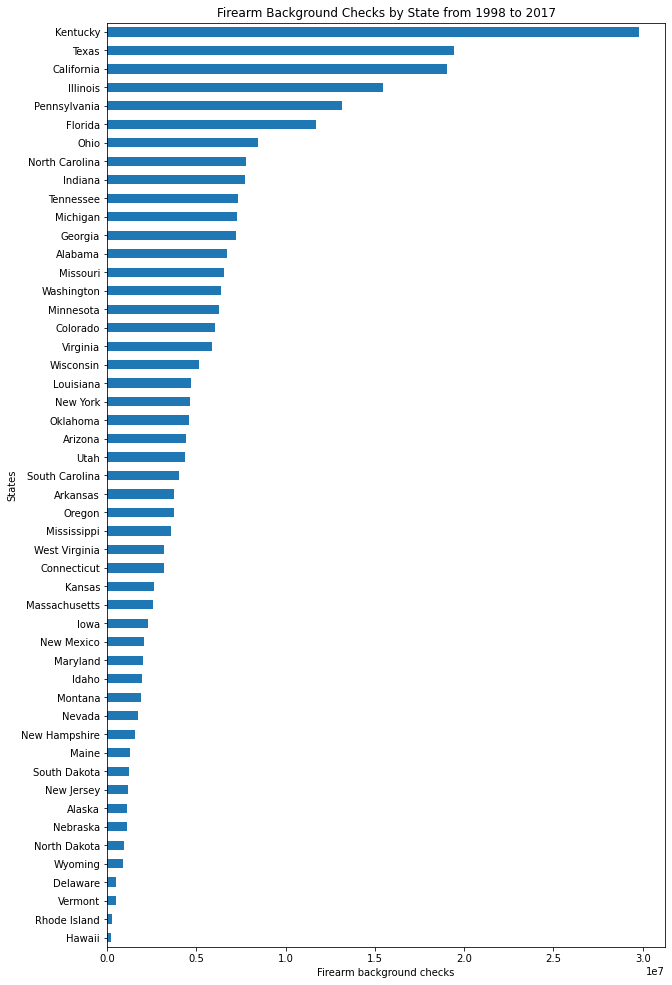

In [78]:
#firearm background checks by state
fig= plt.subplots(figsize=(10,17))
guns_data.groupby('state')['totals'].sum().sort_values(ascending=True).plot.barh()
plt.title('Firearm Background Checks by State from 1998 to 2017')
plt.xlabel('Firearm background checks')
plt.ylabel('States');

So, Kentucky has the most background checks by a big margin and Hawaii has the least.

Now, I will calculate the background checks per capita by state. I will create a new dataframe in which I will group by year (2010 and 2016) and state.

In [79]:
 guns_per_state= guns_2010_16.copy()

In [80]:
#extract the year from the the date format 1970-01-01 00:00:00.00000YYYY
guns_per_state.year = guns_per_state['year'].astype(str).apply(lambda x:x[25:])

In [81]:
#group by the totals checks by state and year 
guns_per_state = guns_per_state.groupby(['state','year'])['totals'].sum()

In [82]:
#transform to a dataframe
guns_per_state = guns_per_state.to_frame()

In [83]:
guns_per_state

totals
state         year        
Alabama       2010  308607
              2016  616947
Alaska        2010   65909
              2016   87647
Arizona       2010  206050
...                    ...
West Virginia 2016  242350
Wisconsin     2010  194797
              2016  561819
Wyoming       2010   47709
              2016   63594

[100 rows x 1 columns]

In [84]:
#reset index so we have state,year and totals as columns
guns_per_state = guns_per_state.reset_index()

In [85]:
#create dataframe for each year 2010 and 2016 from guns_per_state, so we have checks by state in each year separetly
guns_per_state_10 = guns_per_state.query('year == "2010"')
guns_per_state_16 = guns_per_state.query('year == "2016"')

In [86]:
guns_per_state_16.head()

,state,year,totals
1,Alabama,2016,616947
3,Alaska,2016,87647
5,Arizona,2016,416279
7,Arkansas,2016,266014
9,California,2016,2377167


In [87]:
#extract the population data from census data
pop_state=census_transpose[['state','population_estimate_2016','population_estimate_2010']]
#merge the background check per state per year with data about the population on these years
guns_population_state_10 = pop_state.merge(guns_per_state_10)
guns_population_state_16 = pop_state.merge(guns_per_state_16)

In [88]:
guns_population_state_10.head()

,state,population_estimate_2016,population_estimate_2010,year,totals
0,Alabama,4863300.0,4780131.0,2010,308607
1,Alaska,741894.0,710249.0,2010,65909
2,Arizona,6931071.0,6392301.0,2010,206050
3,Arkansas,2988248.0,2916025.0,2010,191448
4,California,39250017.0,37254522.0,2010,816399


In [89]:
#calculate firearm background checks per capita in each state in 2010
guns_population_state_10['per_capita'] = (guns_population_state_10['totals']/guns_population_state_10['population_estimate_2010'])
guns_population_state_10 = guns_population_state_10.sort_values(by=['per_capita'],ascending=True)

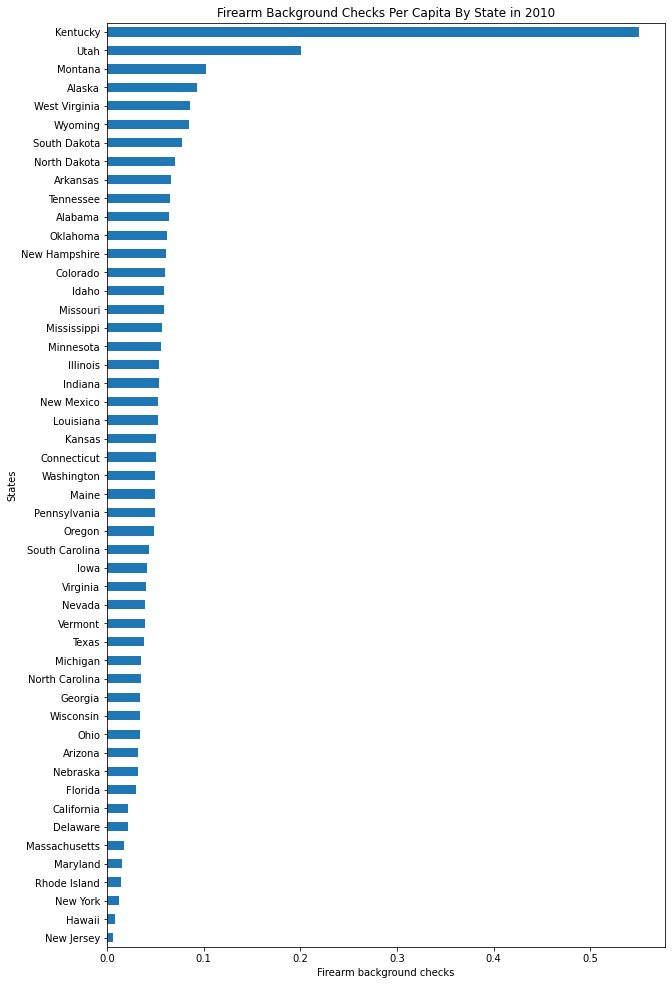

In [90]:
guns_population_state_10.plot(kind='barh',x='state',y='per_capita',legend=False,figsize=(10,17))
plt.title('Firearm Background Checks Per Capita By State in 2010')
plt.xlabel('Firearm background checks')
plt.ylabel('States');

In [91]:
#per capita in 2016
guns_population_state_16['per_capita'] = (guns_population_state_16['totals']/guns_population_state_16['population_estimate_2016'])
guns_population_state_16 = guns_population_state_16.sort_values(by=['per_capita'],ascending=True)

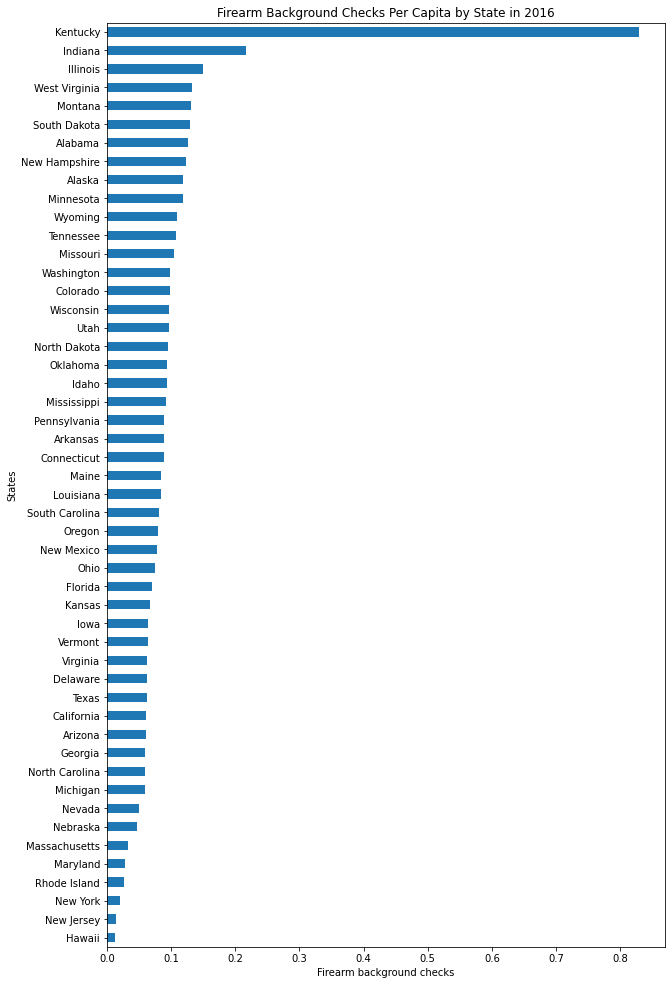

In [92]:
guns_population_state_16.plot(kind='barh',x='state',y='per_capita',legend=False,figsize=(10,17))
plt.title('Firearm Background Checks Per Capita by State in 2016')
plt.xlabel('Firearm background checks')
plt.ylabel('States');

Also Kentucky has the most background checks per capita in 2010 and 2016. Utah was the second in 2010 but was out the top 15 states in 2016. Indiana moved from 19 in 2010 to second in 2016. The others states (3 to 50) have a close background checks per capita in both years.

To see which states changed the most in term of background checks, I will compare the change in each state between 2010 and 2016 because I don't have population data in the other years as I will use the per capita metric to eliminate the expansion or reduction in the size of population in each year.

In [93]:
guns_population_state_16['change_guns_per_capita'] = guns_population_state_16['per_capita'] - guns_population_state_10['per_capita']

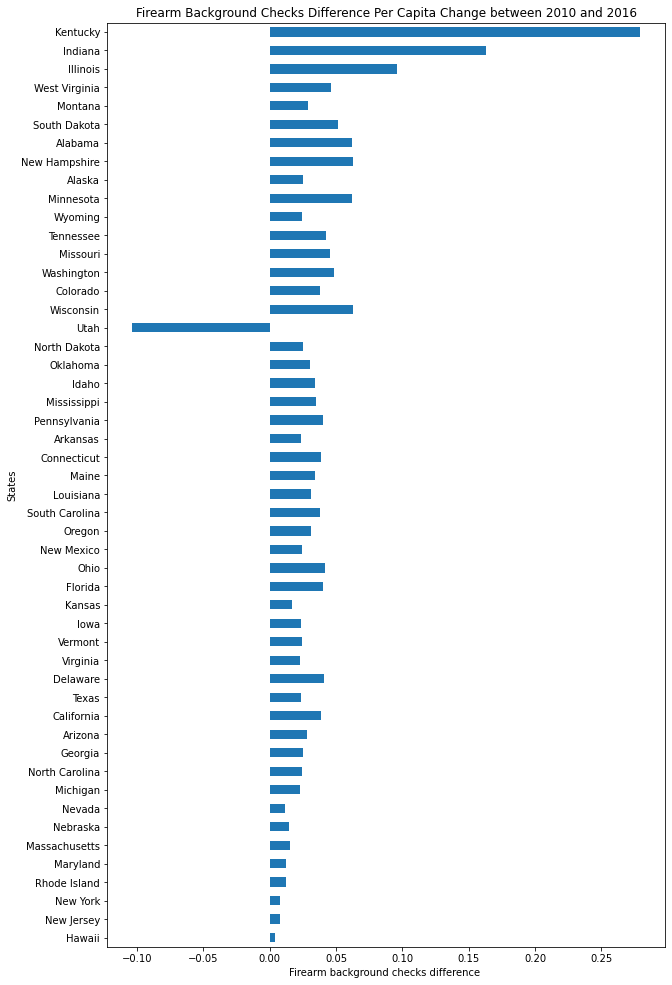

In [94]:
guns_population_state_16.plot(kind='barh',x='state',y='change_guns_per_capita',legend=False,figsize=(10,17))
plt.title('Firearm Background Checks Difference Per Capita Change between 2010 and 2016')
plt.xlabel('Firearm background checks difference ')
plt.ylabel('States');

So, Kentucky, Indiana and Illinois have the biggest increase in background checks from 2010 to 2016 while Utah is the only state that has a decrease in the background checks during this period. Hawaii has almost no change.

### Research Question 3: What census data impact the firearm background checks per capita ?

In this part, I will try to find which factors are the most related to a high gun per capita (not sales). I will focus on the following variables: 
- Race
- Foreign persons
- Veterans
- Housing
- Education
- Income
- Distance from home to work

First, I will analyze the relation between race and gun background checks. I will use per capita metric to compare different races. As the data on the races comes from 2016, I will focus on this year.

** Note: The analyis here is based on the correlation between the background checks per capita and the census factors, and with no further statistics exploration, so correlation does not imply causation. **

#### 1) Race

In [95]:
##I want to merge per capita by state background checks with to the dataframe containing the census data. Before, I will use the dataframes I used above to find the backgrounds per capita in 2010 and 2016.
# As I want to join the per capita background from those dataframes, I will sort the index because it is not ordered after I filtered by year in the previous sections.
guns_population_state_10 = guns_population_state_10.sort_index()
guns_population_state_16 = guns_population_state_16.sort_index()

In [96]:
#extract per_capita10 and per_capita_16 in order to join add them to the census data
per_capita_16 = guns_population_state_16['per_capita']
per_capita_10 = guns_population_state_10['per_capita']
#rename the two series to avoid overlapping while joining 
per_capita_16 = per_capita_16.rename("per_capita_16")
per_capita_10 = per_capita_10.rename("per_capita_10")

In [97]:
#create a new dataframe containing the race data.
race_df = census_transpose[['state', 'population_estimate_2016', 'population_estimate_2010','population_percent_10_16', 'white_percent_2016','black_african_percent_2016', 'amerian_indian_alaska_percent_2016','asian_percent_2016', 'hispanic_latino_percent_2016']]

In [98]:
# add the background per capita to the race dataframe
race_df = race_df.join([per_capita_10,per_capita_16])

In [99]:
race_df.head()

,state,population_estimate_2016,population_estimate_2010,population_percent_10_16,white_percent_2016,black_african_percent_2016,amerian_indian_alaska_percent_2016,asian_percent_2016,hispanic_latino_percent_2016,per_capita_10,per_capita_16
0,Alabama,4863300.0,4780131.0,0.017,0.693,0.268,0.007,0.014,0.042,0.064560,0.126858
1,Alaska,741894.0,710249.0,0.045,0.661,0.038,0.152,0.063,0.070,0.092797,0.118140
2,Arizona,6931071.0,6392301.0,0.084,0.833,0.049,0.054,0.034,0.309,0.032234,0.060060
3,Arkansas,2988248.0,2916025.0,0.025,0.794,0.157,0.010,0.016,0.073,0.065654,0.089020
4,California,39250017.0,37254522.0,0.054,0.727,0.065,0.017,0.148,0.389,0.021914,0.060565


So, I can explore the correlation between gun checks and the different races in US in 2016.

In [100]:
race_df.columns

Index(['state', 'population_estimate_2016', 'population_estimate_2010',
       'population_percent_10_16', 'white_percent_2016',
       'black_african_percent_2016', 'amerian_indian_alaska_percent_2016',
       'asian_percent_2016', 'hispanic_latino_percent_2016', 'per_capita_10',
       'per_capita_16'],
      dtype='object')

In [101]:
#create a function to calculate the correlation coefficient between two columns
def coeficientr(df,col1,col2):
    r = scipy.stats.pearsonr(df[col1],df[col2])
    return round(r[0],4)

In [102]:
#correlation coefficient of each race wit the background checks per capita 2016
r_white = coeficientr(race_df,'per_capita_16','white_percent_2016')
r_black = coeficientr(race_df,'per_capita_16','black_african_percent_2016')
r_indian = coeficientr(race_df,'per_capita_16','amerian_indian_alaska_percent_2016')
r_asian = coeficientr(race_df,'per_capita_16','asian_percent_2016')
r_hipanic = coeficientr(race_df,'per_capita_16','hispanic_latino_percent_2016')

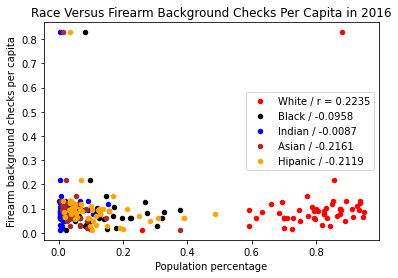

In [103]:
#scatter plot between different races and the checks per capita
ax1 = race_df.plot(kind='scatter', x='white_percent_2016', y='per_capita_16', color='red',legend=True)    
ax2 = race_df.plot(kind='scatter', x='black_african_percent_2016', y='per_capita_16', color='black', ax=ax1)    
ax3 = race_df.plot(kind='scatter', x='amerian_indian_alaska_percent_2016', y='per_capita_16', color='blue', ax=ax1)
ax4 = race_df.plot(kind='scatter', x='asian_percent_2016', y='per_capita_16', color='brown', ax=ax1)
ax5 = race_df.plot(kind='scatter', x='hispanic_latino_percent_2016', y='per_capita_16', color='orange', ax=ax1)
plt.title('Race Versus Firearm Background Checks Per Capita in 2016')
plt.xlabel('Population percentage')
plt.ylabel('Firearm background checks per capita')
plt.legend(['White / r = '+str(r_white), 'Black / ' + str(r_black), 'Indian / ' +str(r_indian), 'Asian / '+str(r_asian), 'Hipanic / '+str(str(r_hipanic)) ],loc='best') 

So, we can see that there is a weak negative correlation between the black and indian americans races and the guns background checks, which means we can't conclude if there is a relation here.

Also, there is a negative correlation between Asian and hipanic population and the background checks, it is stronger than -but not strong,nor weak- the one with black and indian population. That means that when these population represent a bigger part of the society, the guns background checks tend to be lower.

The only positive correlation is with white population with a moderate correlation coeficient. The background checks is higher when white population represents a bigger part of the society.


#### 2) Foreign Born Persons

Next, I will explore the correlation with the persons living in the US but they are born outside. The data available about this is between 2011 and 2015. We don't have data about the population in this period. We have also to get the totals of background checks during this 4 year span. 

In [104]:
#guns data from 2011 to 2015
guns_11_to_15 = guns_data[guns_data['month'].dt.year.astype(str).str.contains('2011|2012|2013|2014|2015')]

In [105]:
# checks during this period by state
guns_per_state_11_to_15 = guns_11_to_15.groupby('state')['totals'].sum()

In [106]:
guns_per_state_11_to_15.head()

state
Alabama       2690152
Alaska         422189
Arizona       1596290
Arkansas      1223785
California    6642294
Name: totals, dtype: int64

As I don't have the population from 2011 to 2015, I will use the average population between 2010 and 2016.

In [107]:
#calculate the average population from 2010 and 2016 as an estimate for 2011-2015
pop_state['population_11_15'] = (pop_state['population_estimate_2016']+pop_state['population_estimate_2010'])/2

<ipython-input-107-6e15252b2c08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_state['population_11_15'] = (pop_state['population_estimate_2016']+pop_state['population_estimate_2010'])/2


In [108]:
guns_per_capita_11_15 = pop_state[['state','population_11_15']]

In [109]:
#add the totals guns checks per state in 2011-2015 to the dataframe of the population estimation of this period.
guns_per_capita_11_15 = guns_per_capita_11_15.assign(totals=guns_per_state_11_to_15.values)

In [110]:
#create a column for the guns per capita during this period
guns_per_capita_11_15['per_capita_11_15'] = guns_per_capita_11_15['totals'] / guns_per_capita_11_15['population_11_15']

In [111]:
guns_per_capita_11_15.head()

,state,population_11_15,totals,per_capita_11_15
0,Alabama,4821715.5,2690152,0.557924
1,Alaska,726071.5,422189,0.581470
2,Arizona,6661686.0,1596290,0.239623
3,Arkansas,2952136.5,1223785,0.414542
4,California,38252269.5,6642294,0.173644


In [112]:
#extract the immigrants data from census dataframe
foreigns_percent_df = census_transpose[['state','foreigns_percent_11_15']]

In [113]:
foreigns_percent_df = foreigns_percent_df.merge(guns_per_capita_11_15, on='state', how='left')

In [114]:
foreigns_percent_df.head()

,state,foreigns_percent_11_15,population_11_15,totals,per_capita_11_15
0,Alabama,0.035,4821715.5,2690152,0.557924
1,Alaska,0.074,726071.5,422189,0.581470
2,Arizona,0.135,6661686.0,1596290,0.239623
3,Arkansas,0.047,2952136.5,1223785,0.414542
4,California,0.270,38252269.5,6642294,0.173644


Now, I will see the correlation between foreign persons percent of a population and the number of background checks per capita.

In [115]:
foreigns_r = coeficientr(foreigns_percent_df,'foreigns_percent_11_15','per_capita_11_15')

Text(0.2, 2.5, 'r = -0.3787')

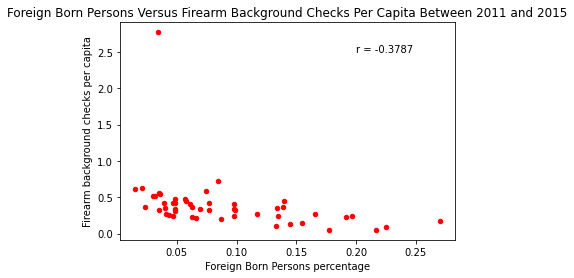

In [116]:
foreigns_percent_df.plot(kind='scatter', x='foreigns_percent_11_15', y='per_capita_11_15', color='red')    
plt.title('Foreign Born Persons Versus Firearm Background Checks Per Capita Between 2011 and 2015')
plt.xlabel('Foreign Born Persons percentage')
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(foreigns_r), xy=(0.2,2.5) 
            )

From the above scatter and correlation coefficient, there is a negative relationship between the immigrants percent of the population and the number backgroud checks. The realtion is not so strong but it is moderate. So, we can say that the firearm background checks is lower when the percentage of foreign persons in a population is higher.

#### 3) Veterans
The third studied factor is the veterans in the population. As well, the veterans data is from 2011 to 2015, so I will use the same guns background checks per capita used above in the foreign persons analysis. 

In [117]:
census_transpose.columns

Index(['state', 'population_estimate_2016', 'population_estimate_2010',
       'population_percent_10_16', 'white_percent_2016',
       'black_african_percent_2016', 'amerian_indian_alaska_percent_2016',
       'asian_percent_2016', 'hispanic_latino_percent_2016', 'veterans_11_15',
       'foreigns_percent_11_15', 'housing_units_2016', 'housing_units_2010',
       'housing_unit_percent_11_15', 'median_value_housing units_11_15',
       'households,_11_15', 'persons_per_household_11_15',
       'high_school_graduate_percent_11-15', 'bachelor_degree_percent_11-15',
       'mean_minutes_to_work_11_15', 'median_household_income_11_15',
       'per_capita_income_11_15', 'persons_in_poverty_percent',
       'total_employment_2015', 'total_annual_payroll_15', 'density_2010'],
      dtype='object')

In [118]:
#same process as for the foreign persons
veterans_df = census_transpose[['state','veterans_11_15']]

In [119]:
veterans_df = veterans_df.merge(guns_per_capita_11_15, on='state', how='left')

In [120]:
veterans_df.head()

,state,veterans_11_15,population_11_15,totals,per_capita_11_15
0,Alabama,363170.0,4821715.5,2690152,0.557924
1,Alaska,69323.0,726071.5,422189,0.581470
2,Arizona,505794.0,6661686.0,1596290,0.239623
3,Arkansas,220953.0,2952136.5,1223785,0.414542
4,California,1777410.0,38252269.5,6642294,0.173644


In [121]:
veterans_r = coeficientr(veterans_df,'veterans_11_15','per_capita_11_15')
veterans_r

-0.1646

Text(1.5, 2.5, 'r = -0.1646')

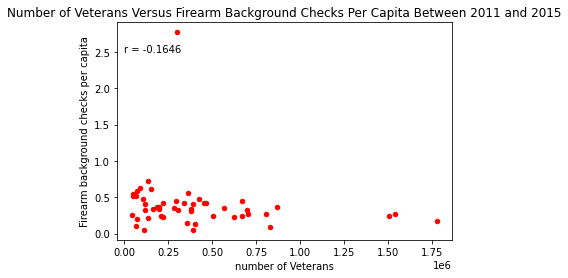

In [122]:
veterans_df.plot(kind='scatter', x='veterans_11_15', y='per_capita_11_15', color='red')    
plt.title('Number of Veterans Versus Firearm Background Checks Per Capita Between 2011 and 2015')
plt.xlabel('number of Veterans')
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(veterans_r), xy=(1.5,2.5))

So, the correlation between the size of the veterans population and the guns background checks is weak and negative. But we notice that itdoesn't count the percentage of the veterans in the population which could be a more accurate metric. So, I will create a column for the percent of veterans and analyze it with the background checks. 

In [123]:
veterans_df['veteran_percent'] = veterans_df['veterans_11_15'] / veterans_df['population_11_15']

In [124]:
veterans_perecent_r = coeficientr(veterans_df,'veteran_percent','per_capita_11_15')
veterans_perecent_r

0.1045

So, it is a postive relation when we use perecentage instead of size.

Text(0.045, 2.5, 'r = 0.1045')

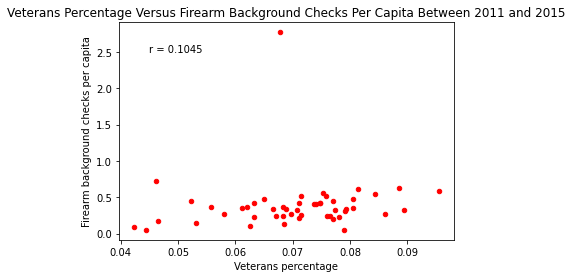

In [125]:
veterans_df.plot(kind='scatter', x='veteran_percent', y='per_capita_11_15', color='red')    
plt.title('Veterans Percentage Versus Firearm Background Checks Per Capita Between 2011 and 2015')
plt.xlabel('Veterans percentage')
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(veterans_perecent_r), xy=(0.045,2.5) 
            )

Despite the direction of the two factors with the background checks, the correlation is weak, and I don't think it is enough to say that the guns background checks increase with a higher percentage of veterans in the population. 

#### 4) Housings
The next factor to explore is the housing data in 2010 and 2016

In [126]:
housing_units_df = census_transpose[['state','housing_units_2016', 'housing_units_2010']]

In [127]:
housing_units_df['per_capita_16'] = per_capita_16
housing_units_df['per_capita_10'] = per_capita_10

<ipython-input-127-44ba44a06bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_units_df['per_capita_16'] = per_capita_16
<ipython-input-127-44ba44a06bbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_units_df['per_capita_10'] = per_capita_10


In [128]:
housing_units_df.head()

,state,housing_units_2016,housing_units_2010,per_capita_16,per_capita_10
0,Alabama,2230185.0,2171853.0,0.126858,0.064560
1,Alaska,310658.0,306967.0,0.118140,0.092797
2,Arizona,2961003.0,2844526.0,0.060060,0.032234
3,Arkansas,1354762.0,1316299.0,0.089020,0.065654
4,California,14060525.0,13680081.0,0.060565,0.021914


In [129]:
housing_unit_10_r = coeficientr(housing_units_df,'housing_units_2010','per_capita_10')
housing_unit_16_r = coeficientr(housing_units_df,'housing_units_2016','per_capita_16')

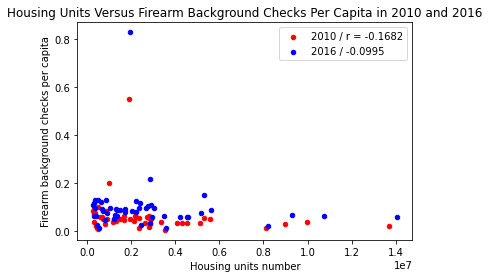

In [130]:
ax1 = housing_units_df.plot(kind='scatter', x='housing_units_2010', y='per_capita_10', color='red')    
ax2 = housing_units_df.plot(kind='scatter', x='housing_units_2016', y='per_capita_16', color='blue',ax=ax1)
plt.title('Housing Units Versus Firearm Background Checks Per Capita in 2010 and 2016')
plt.xlabel('Housing units number')
plt.ylabel('Firearm background checks per capita')
plt.legend(['2010 / r = '+str(housing_unit_10_r), '2016 / ' + str(housing_unit_16_r)],loc='best')



So, in both year, the relation between housing units and guns backgound checks is so weak, so we can't conclude that with a more housing units, the background checks tend to be lower.

Let's check now the correlation between the value of these housing units and the background checks of guns. The data are available from 2011 to 2015.

In [131]:
housing_value_df = census_transpose[['state','median_value_housing units_11_15']]
housing_value_df = housing_value_df.merge(guns_per_capita_11_15, on='state', how='left')
housing_value_r = coeficientr(housing_value_df,'median_value_housing units_11_15','per_capita_11_15')

Text(100000, 2.5, 'r = -0.2976')

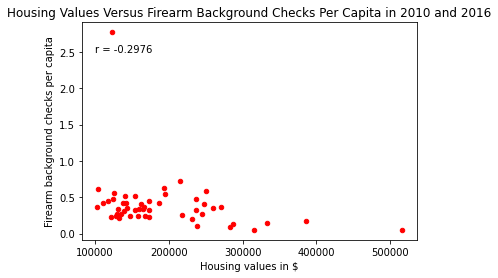

In [132]:
housing_value_df.plot(kind='scatter', x='median_value_housing units_11_15', y='per_capita_11_15', color='red')    
plt.title('Housing Values Versus Firearm Background Checks Per Capita in 2010 and 2016')
plt.xlabel('Housing values in $')
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(housing_value_r), xy=(100000,2.5) 
            )

The relation above is negative and moderate, as r is close to 0.3. That means the backgroud checks is higher when the value of housing is less expensive.

#### 5) Education
The data about education covers the percent of population having a high school and a bachelor's degree

In [133]:
education_df= census_transpose[['state','high_school_graduate_percent_11-15', 'bachelor_degree_percent_11-15']]
education_df = education_df.merge(guns_per_capita_11_15, on='state', how='left')
education_HS_r = coeficientr(education_df,'high_school_graduate_percent_11-15','per_capita_11_15')
education_BS_r = coeficientr(education_df,'bachelor_degree_percent_11-15','per_capita_11_15')

Text(0.82, 2.5, 'r = -0.0871')

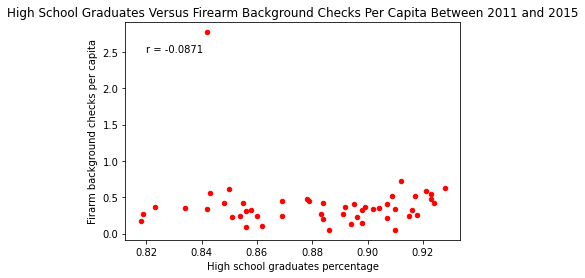

In [134]:
#high school
education_df.plot(kind='scatter', x='high_school_graduate_percent_11-15', y='per_capita_11_15', color='red')    

plt.title('High School Graduates Versus Firearm Background Checks Per Capita Between 2011 and 2015')
plt.xlabel("High school graduates percentage")
plt.ylabel('Firarm background checks per capita')
plt.annotate('r = '+str(education_HS_r), xy=(0.82,2.5) 
            )


Text(0.2, 2.5, 'r = -0.3317')

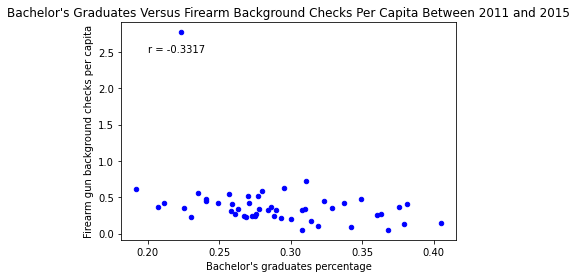

In [135]:
#Bachelors
education_df.plot(kind='scatter', x='bachelor_degree_percent_11-15', y='per_capita_11_15', color='blue')
plt.title("Bachelor's Graduates Versus Firearm Background Checks Per Capita Between 2011 and 2015")
plt.xlabel("Bachelor's graduates percentage")
plt.ylabel('Firearm gun background checks per capita')
plt.annotate('r = '+str(education_BS_r), xy=(0.2,2.5) 
            )

There is a negative relation between the two level of education and the gun background checks, which is so logical.
The correlation coefficent between high schools graduate and guns background checks is so small, which can't help us to make a conclusion, while 
the correlation coefficent between bachelor's degree and guns background checks is enough to say that when the percentage of college degree increase, the guns checks per capita background decrease. 

In [136]:
census_transpose.columns

Index(['state', 'population_estimate_2016', 'population_estimate_2010',
       'population_percent_10_16', 'white_percent_2016',
       'black_african_percent_2016', 'amerian_indian_alaska_percent_2016',
       'asian_percent_2016', 'hispanic_latino_percent_2016', 'veterans_11_15',
       'foreigns_percent_11_15', 'housing_units_2016', 'housing_units_2010',
       'housing_unit_percent_11_15', 'median_value_housing units_11_15',
       'households,_11_15', 'persons_per_household_11_15',
       'high_school_graduate_percent_11-15', 'bachelor_degree_percent_11-15',
       'mean_minutes_to_work_11_15', 'median_household_income_11_15',
       'per_capita_income_11_15', 'persons_in_poverty_percent',
       'total_employment_2015', 'total_annual_payroll_15', 'density_2010'],
      dtype='object')

#### 6) Income
I will explore the median income per household and the income per capita and their relationships with the firearm backrground checks per capita. Both data are from 2011-2015.

In [137]:
#create a datframe for the income
income_df = census_transpose[['state','median_household_income_11_15','per_capita_income_11_15']]
income_df = income_df.merge(guns_per_capita_11_15, on='state', how='left')
income_median_r = coeficientr(income_df,'median_household_income_11_15','per_capita_11_15')
income_perCapita_r = coeficientr(income_df,'per_capita_income_11_15','per_capita_11_15')

Text(40000, 2.5, 'r = -0.2736')

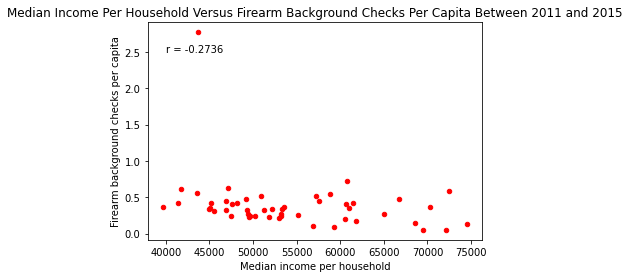

In [138]:
#median income
income_df.plot(kind='scatter', x='median_household_income_11_15', y='per_capita_11_15', color='red')
plt.title("Median Income Per Household Versus Firearm Background Checks Per Capita Between 2011 and 2015")
plt.xlabel("Median income per household")
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(income_median_r), xy=(40000,2.5) 
            )

Text(22500, 2.5, 'r = -0.2825')

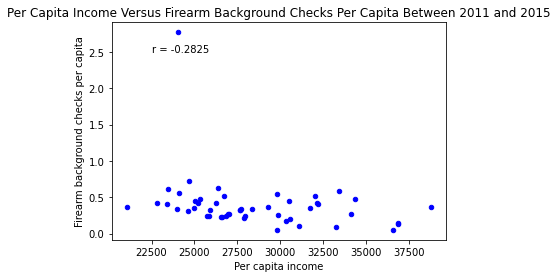

In [139]:
#per capita income
income_df.plot(kind='scatter', x='per_capita_income_11_15', y='per_capita_11_15', color='blue')
plt.title("Per Capita Income Versus Firearm Background Checks Per Capita Between 2011 and 2015")
plt.xlabel("Per capita income")
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(income_perCapita_r), xy=(22500,2.5) 
            )

Both metrics of income have a negative relationship with firearm background checks. The two correlation coefficient is enough to say that in the states where the income per capita or median income per household is higher, the firearm background checks per capita is lower.

#### 7) Poverty

In [140]:
poverty_df = census_transpose[['state','persons_in_poverty_percent']]
poverty_df = poverty_df.merge(guns_per_capita_11_15, on='state', how='left')
poverty_r = coeficientr(poverty_df,'persons_in_poverty_percent','per_capita_11_15')


Text(0.08, 2.5, 'r = 0.2491')

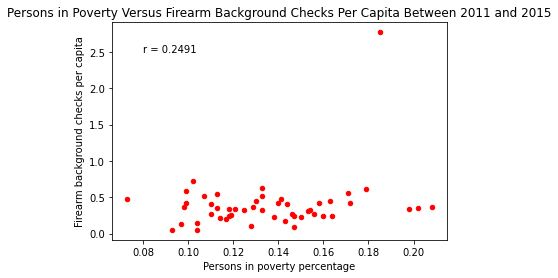

In [141]:
poverty_df.plot(kind='scatter', x='persons_in_poverty_percent', y='per_capita_11_15', color='red')
plt.title("Persons in Poverty Versus Firearm Background Checks Per Capita Between 2011 and 2015")
plt.xlabel("Persons in poverty percentage")
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(poverty_r), xy=(0.08,2.5) 
            )

From the above scatter, the relation between poverty and guns background checks is positive. States with higher percent of poor people have a higher background checks. 

#### 8) Distance to work

In [142]:
travel_df = census_transpose[['state','mean_minutes_to_work_11_15']]
travel_df = travel_df.merge(guns_per_capita_11_15, on='state', how='left')
travel_r = coeficientr(travel_df,'mean_minutes_to_work_11_15','per_capita_11_15')

Text(18, 2.5, 'r = -0.2597')

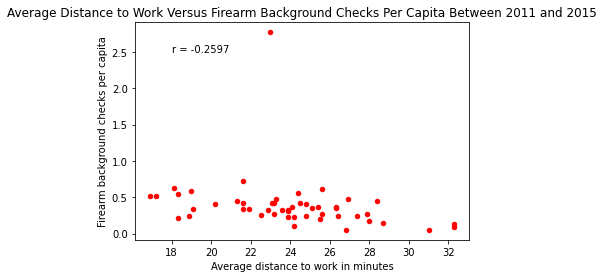

In [143]:
travel_df.plot(kind='scatter', x='mean_minutes_to_work_11_15', y='per_capita_11_15', color='red')
plt.title("Average Distance to Work Versus Firearm Background Checks Per Capita Between 2011 and 2015")
plt.xlabel("Average distance to work in minutes")
plt.ylabel('Firearm background checks per capita')
plt.annotate('r = '+str(travel_r), xy=(18,2.5) 
            )

The relation between distance to work is negative with the firearm background checks. So, when the distance to work is longer, the background checks tend to be higher. 

#################################

<a id='conclusions'></a>
## Conclusions

### Findings: 

- The overall trend of firearm background checks in the US for all types of guns rose in a constant, but periodic manner in each year with a peak towards the end of the year. 
It increased rapidly from 2010 to 2017 as the guns background checks per capita doubled from 2010 to 2016.

- The background checks for long guns was the most from 1998 to 2014, then from this year, the background checks for handguns took over. The checks per capita for handgun doubled from 2010 to 2016 while background checks per capita increased by about 20 %.

 The least background checks was for the multiple guns which has an almost linear pattern over the time close to 0.

- Kentucky has the most number of background checks in general. Texas, California, Illinois, and Pennsylvania comes after. The lowest number of background checks was found in Hawaii.


In 2010, Utah had the second highest background checks per capita, followed by Monatana, Alaska, and West Virginia. New Jersey had the lowest background checks per capita.

In 2016, Indiana surpassed others states-except Kentucky- as the second highest background checks. Illinois as well becomes the third states in term of checks per capita.

So, comparing checks per capita in 2010 and 2016, all states -except Utah- has a positive growth with Kentucky, Indiana, and Illinois in the top 3. Utah showed a decrease of 0.1 checks per capita from 2010 to 2016.

- There was not a strong relationhip between any census factor and the background checks per capita in 2010,2016 and between 2011 and 2015, as no correlation coefficient was bigger than or equal to +- 0.7. 

- The states with higher white population percentage tend to have a higher background checks per capita, while the states with higher percentage of asian and hispanic population tend to have a lower checks background per capita while the relation is not significant for black and indian/native population.

- The states with a higher foreign born persons percentage are more probable to have a lower firearm background checks per capita.

- The states with a higher percentage of veterans tend to have a higher background per checks though the coefficient was not enough to make a conclusion.

- The states with higher percentages of bachelor's graduate tend to have a lower background checks per capita while the realtion with high school graduate is weak to tell the same thing.

- The states with higher income per capita and median income per household tend to have a lower firearm background checks per capita.

- Longer the average distance to work is, lower the firearm background checks per capita is.

### Limitations:
 
- The data about the firearm is not a sale data, so it is not possible to make an accurate concluion about the sales of guns in US.

- The census data covers a few numbers of years, which make the study of the realtion between this data and the guns data not so accurate. Also, there was no data provided about population between 2011 and 2015 while several census data were collected in this period, which make the calculation in this period use an estimate of the population. 

<a id='conclusions'></a>

### 

## References:
-  NICS data from BuzzFeed https://github.com/BuzzFeedNews/nics-firearm-background-checks
- Pandas documentation https://pandas.pydata.org/
- Numpy where functon - Pass a column as argument to fillna https://www.geeksforgeeks.org/numpy-where-in-python/ and https://stackoverflow.com/questions/30357276/how-to-pass-another-entire-column-as-argument-to-pandas-fillna
- Extract month and year from datetime https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
- Tranpose and different reshape functions https://stackoverflow.com/questions/46287241/python-pandas-melt-pivot-transpose-on-multiple-columns
- Drop columns with NaN as a header https://stackoverflow.com/questions/46101714/pandas-how-to-drop-multiple-columns-with-nan-as-col-name
- Matplotlib documentation https://matplotlib.org/stable/tutorials/index.html
